In [1]:
#%pylab inline
#import pandas as pd
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.io import FortranFile
from skimage import measure
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection


In [9]:
gridfile='/raid2/rafkin/output/PP_Ls270_static-S-g03.nc'
#modelfile='/raid2/rafkin/output/PP_Ls270-S-g04.nc'
#tracerfile='/raid2/rafkin/output/PP_Ls270_tracers-S-g04.nc'
#gridfile='/raid2/rafkin/output/Insight_Ls312_static-S-g01.nc'
#modelfile='/raid2/rafkin/output/Insight_Ls312_state-S-g01.nc'
#tracerfile='/raid2/rafkin/output/PP_Ls270_tracers-S-g05.nc'
modelfile='/raid1/jpla/outputs_PP_LS90/PP_Gale_Ls90/vis_NetCDF/PP_Gale_Ls90-S-g03.nc'
gf=Dataset(gridfile,mode='r')
mf=Dataset(modelfile,model='r')
#tf=Dataset(tracerfile,model='r')
#
# files are open and ready to read
# extract wanted data as 1D list array
# Note that this re
#ads in ALL the data and is SLOW
# Probably a way to read in only the stuff we want
# but I haven't figured that out yet.
#
glon = gf.variables['glon'][:]
glat = gf.variables['glat'][:]
topo = gf.variables['topo'][:]
u_avg_tN=mf.variables['u_avg_tN'][0:900,:,:,:]
v_avg_tN=mf.variables['v_avg_tN'][0:900,:,:,:]
sclr1=mf.variables['sclr001'][0:900,:,:,:]
#sclr2=mf.variables['sclr002'][0:900,:,:,:]
#sclr3=mf.variables['sclr003'][0:900,:,:,:]
#sclr4=mf.variables['sclr004'][0:900,:,:,:]
#sclr5=mf.variables['sclr005'][0:900,:,:,:]
#sclr6=mf.variables['sclr006'][0:900,:,:,:]
#sclr7=mf.variables['sclr007'][0:900,:,:,:]
#sclr8=mf.variables['sclr008'][0:900,:,:,:]
#sclr9=mf.variables['sclr009'][0:900,:,:,:]
#sclr10=mf.variables['sclr010'][0:900,:,:,:]
#sclr11=mf.variables['sclr011'][0:900,:,:,:]
#sclr12=mf.variables['sclr012'][0:900,:,:,:]
#sclr13=mf.variables['sclr013'][0:900,:,:,:]
#sclr14=mf.variables['sclr014'][0:900,:,:,:]
#sclr15=mf.variables['sclr015'][0:900,:,:,:]
#sclr16=mf.variables['sclr016'][0:900,:,:,:]
#sclr17=mf.variables['sclr017'][0:900,:,:,:]
#sclr18=mf.variables['sclr018'][0:900,:,:,:]
#sclr19=mf.variables['sclr019'][0:900,:,:,:]
#sclr20=mf.variables['sclr020'][0:900,:,:,:]
#sclr21=mf.variables['sclr021'][0:900,:,:,:]
#sclr22=mf.variables['sclr022'][0:900,:,:,:]
#sclr23=mf.variables['sclr023'][0:900,:,:,:]
tempk=mf.variables['tempk'][:]
#
# Reload these into 2D or 3D arrays
# Note that there is only 1 time for grid data
# and even for glon, glat, topo...stored as 3D in netcdf
# First element is time, followed by x, y then z
#
lat=glat[0,:,:]
lon=glon[0,:,:]
topo2d=topo[0,:,:]
#sclr3d_1=sclr1[21,:,:,:]  #grab time 22...indexing starts at 0
#cs0=plt.contourf(lon,lat,topo2d)
#cs1=plt.contour(lon,lat,lat)
#cs2=plt.contour(lon,lat,lon)
#plt.show()
#sclr12.shape

(862, 128, 98, 50)
shape of sclr1 is (862, 128, 98, 50)


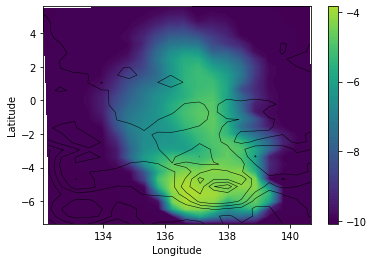

In [18]:
print(tempk.shape)
print("shape of sclr1 is",sclr1.shape)
fig = plt.figure()
ax = fig.add_subplot(111)
#xmin=20
#xmax=77
#ymin=20
#ymax=74
xmin=25
xmax=45
#ymin=0
ymin=30
ymax=60
#ymax=
xlon=lon[ymin:ymax,xmin:xmax]
xlat=lat[ymin:ymax,xmin:xmax]
#levels=[-6,-4,-2,0]
levels=24
#zdat1=sclr1[35:36,ymin:ymax,xmin:xmax,1] #sum over time 1 and 40
#zsum1=np.sum(zdat1,axis=0)
#zdat12=sclr12[135+36:136+36,ymin:ymax,xmin:xmax,1] #sum over time 1 and 40
#zsum12=np.sum(zdat12,axis=0)
u=u_avg_tN[143,ymin:ymax,xmin:xmax,1]
v=v_avg_tN[143,ymin:ymax,xmin:xmax,1]
temp=tempk[143,ymin:ymax,xmin:xmax,1]
sclr=sclr1[143,ymin:ymax,xmin:xmax,1]
#cs1=plt.contour(lon,lat,topo2d)
#cs2=ax.contour(xlon,xlat,zsum,levels)
#ax.contour(xlon,xlat,np.log10(zdat+1.e-10))
#cs1=plt.contourf(xlon,xlat,np.log10(np.maximum(zsum12,1.e-10)), levels)
#cs1=plt.contour(xlon,xlat,temp)
#cs1=plt(temp)
#plt.colorbar()
#ax.clabel(cs1,inline=1, fontsize=12, fmt="%1d", colors='black')
#cs12=plt.contour(xlon,xlat,np.log10(zsum12+1.e-10), levels, colors='red',linestyles='solid', linewidths=0.75)
#ax.clabel(cs12,inline=1, fontsize=12, fmt="%1d", colors='black')
cs0=plt.contour(xlon,xlat,topo2d[ymin:ymax,xmin:xmax], linewidths=0.5, colors='black', linestyles='solid')
#ax.clabel(cs12,inline=1,fontsize=12, fmt="%1d", colors='red')
#plt.quiver(xlon,xlat,u,v)
plt.xlabel('Longitude')        
plt.ylabel('Latitude')    
#plt.title('Tracer #1 in Gale Crater 3 Hours after 0600 LMST Release')
#plt.title('Tracer #12 in Gale Crater 3 Hours after 1800 LMST Release')
#plt.show(cs0)
#plt.contourf(lon,lat,topo2d)
plt.contourf(xlon,xlat, np.log10(sclr+1.e-10),100,vmin=-10,vmax=-3)
plt.colorbar(ticks=[-10,-8,-6,-4,-2,0])
plt.show()



In [10]:
print(sclr1.shape)
print(topo2d.shape)
print(topo2d)
np.log10(sclr1[80,:,:,1]+1.e-6)

(862, 95, 98, 50)
(95, 98)
[[ -328.77368  -272.59305  -234.57822 ...  -176.15219  -199.4192
   -222.97002]
 [ -428.29718  -430.8771   -404.2594  ...  -203.12498  -227.16893
   -258.63794]
 [ -497.92548  -511.53638  -486.90256 ...  -235.62337  -260.15305
   -294.19308]
 ...
 [-2092.677   -2102.3516  -2130.8232  ... -2433.65    -2402.7493
  -2139.3645 ]
 [-2099.141   -2107.2144  -2134.1575  ... -2459.1653  -2448.6143
  -2241.2324 ]
 [-2108.1223  -2114.8706  -2136.1106  ... -2464.8787  -2478.323
  -2372.6804 ]]


/tmp/ipykernel_3505206/922974004.py:4: RuntimeWarning: invalid value encountered in log10
  np.log10(sclr1[80,:,:,1]+1.e-6)


masked_array(
  data=[[-6.0, -6.0, -6.0, ..., -6.0, -6.0, -6.0],
        [-6.0, -6.0, -6.0, ..., -6.0, -6.0, -6.0],
        [-6.0, -6.0, -6.0, ..., -6.0, -6.0, -6.0],
        ...,
        [-6.0, -6.0, -6.0, ..., -5.99998664855957, -5.9999895095825195,
         -5.9999775886535645],
        [-6.0, -6.0, -6.0, ..., -5.999982833862305, -5.9999871253967285,
         -5.999980926513672],
        [-6.0, -6.0, -6.0, ..., -5.999988555908203, -5.9999895095825195,
         -5.9999871253967285]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],
  fill_value=1e+20,
  dtype=float32)

In [ ]:
import plotly.figure_factory as ff
fig = ff.create_quiver(xlon, xlat, u, v)
fig.show()
print(xlon.shape,xlat.shape,u.shape,v.shape)